In [19]:
import IPython.display as display
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.constraints import max_norm
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import xception
from tensorflow.keras.applications import inception_v3
import glob
import random

In [14]:
shift = 0.2
IMAGE_SIZE = 224
BATCH_SIZE = 300
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.5,
        zoom_range=0.5,
        horizontal_flip=True,
        rotation_range = 90)

val_datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.5,
        zoom_range=0.5,
        horizontal_flip=True,
        rotation_range = 90)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        "output/train",
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        "output/val",
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 16418 images belonging to 120 classes.
Found 2009 images belonging to 120 classes.


In [20]:
test_img_paths = glob.glob('output/test/*/*.jpg')
val_img_paths = glob.glob('output/val/*/*.jpg')
train_img_paths = glob.glob('output/train/*/*.jpg')
random.shuffle(test_img_paths)
random.shuffle(val_img_paths)
random.shuffle(train_img_paths)

print('Train Data Set Size:', len(train_img_paths))
print('Validation Data Set Size:', len(val_img_paths))
print('Test Data Set Size:', len(test_img_paths))

Train Data Set Size: 16418
Validation Data Set Size: 2009
Test Data Set Size: 2153


## Looking at Test data set on Pre-Trained ResNet50 Con. Nueral Network

In [16]:
model = ResNet50()

In [18]:
pred_y = []
for img_path in test_img_paths:
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    print(decode_predictions(preds, top=3)[0])
    pred_y.append(decode_predictions(preds, top=3)[0])

[('n02095570', 'Lakeland_terrier', 0.3021399), ('n02097130', 'giant_schnauzer', 0.17267172), ('n02097298', 'Scotch_terrier', 0.11432776)]
[('n02096437', 'Dandie_Dinmont', 0.9870576), ('n02095889', 'Sealyham_terrier', 0.0059708073), ('n02098105', 'soft-coated_wheaten_terrier', 0.005125316)]
[('n02107312', 'miniature_pinscher', 0.97568375), ('n02107142', 'Doberman', 0.01941776), ('n02106550', 'Rottweiler', 0.004521027)]
[('n02099712', 'Labrador_retriever', 0.9949474), ('n02099849', 'Chesapeake_Bay_retriever', 0.0035976984), ('n02099429', 'curly-coated_retriever', 0.0003108482)]
[('n02097658', 'silky_terrier', 0.6131846), ('n02096294', 'Australian_terrier', 0.29141977), ('n02091635', 'otterhound', 0.031762708)]
[('n02095314', 'wire-haired_fox_terrier', 0.98227537), ('n02095570', 'Lakeland_terrier', 0.011734409), ('n02096051', 'Airedale', 0.003131338)]
[('n02093859', 'Kerry_blue_terrier', 0.9996331), ('n02095570', 'Lakeland_terrier', 0.00011786578), ('n02106382', 'Bouvier_des_Flandres', 7.

[('n02086910', 'papillon', 0.58827376), ('n02113186', 'Cardigan', 0.31051067), ('n02113023', 'Pembroke', 0.028093195)]
[('n02097474', 'Tibetan_terrier', 0.5387622), ('n02106166', 'Border_collie', 0.14896847), ('n02106030', 'collie', 0.08572531)]
[('n02110958', 'pug', 0.9970264), ('n02112706', 'Brabancon_griffon', 0.0011378196), ('n02123597', 'Siamese_cat', 0.00038043005)]
[('n02116738', 'African_hunting_dog', 0.999663), ('n02115913', 'dhole', 0.00014572887), ('n02117135', 'hyena', 0.00013254298)]
[('n02108915', 'French_bulldog', 0.9983063), ('n02096585', 'Boston_bull', 0.0006154507), ('n02110958', 'pug', 0.0004272655)]
[('n02088094', 'Afghan_hound', 0.99856323), ('n02091831', 'Saluki', 0.00067379646), ('n02100877', 'Irish_setter', 0.00015265773)]
[('n02094433', 'Yorkshire_terrier', 0.95311606), ('n02087046', 'toy_terrier', 0.017141318), ('n02097658', 'silky_terrier', 0.015994161)]
[('n02096294', 'Australian_terrier', 0.68067676), ('n02094258', 'Norwich_terrier', 0.21410641), ('n0209765

[('n02096177', 'cairn', 0.85886043), ('n02094258', 'Norwich_terrier', 0.12748203), ('n02094114', 'Norfolk_terrier', 0.009985946)]
[('n02087394', 'Rhodesian_ridgeback', 0.9980124), ('n02090379', 'redbone', 0.00124687), ('n02109047', 'Great_Dane', 0.00030869292)]
[('n02091032', 'Italian_greyhound', 0.9564101), ('n02091134', 'whippet', 0.037955716), ('n02113978', 'Mexican_hairless', 0.004645695)]
[('n02097130', 'giant_schnauzer', 0.985075), ('n02097209', 'standard_schnauzer', 0.0147649115), ('n02097298', 'Scotch_terrier', 8.496347e-05)]
[('n02108000', 'EntleBucher', 0.39983368), ('n02107574', 'Greater_Swiss_Mountain_dog', 0.27614015), ('n02107908', 'Appenzeller', 0.210832)]
[('n02108000', 'EntleBucher', 0.58750343), ('n02107908', 'Appenzeller', 0.36636502), ('n02107574', 'Greater_Swiss_Mountain_dog', 0.040463418)]
[('n02105056', 'groenendael', 0.951787), ('n02104365', 'schipperke', 0.025399603), ('n02112018', 'Pomeranian', 0.011472686)]
[('n02094114', 'Norfolk_terrier', 0.8625444), ('n020

[('n02088094', 'Afghan_hound', 0.16653545), ('n02095570', 'Lakeland_terrier', 0.10425259), ('n02095314', 'wire-haired_fox_terrier', 0.084753536)]
[('n02116738', 'African_hunting_dog', 0.9803153), ('n02117135', 'hyena', 0.016417222), ('n02115913', 'dhole', 0.002170249)]
[('n02115641', 'dingo', 0.60513514), ('n02109047', 'Great_Dane', 0.12111985), ('n02087394', 'Rhodesian_ridgeback', 0.06289172)]
[('n02134084', 'ice_bear', 0.36976954), ('n02099712', 'Labrador_retriever', 0.14745845), ('n02114548', 'white_wolf', 0.12375174)]
[('n02096294', 'Australian_terrier', 0.9723656), ('n02094433', 'Yorkshire_terrier', 0.009511741), ('n02094258', 'Norwich_terrier', 0.008625836)]
[('n02086079', 'Pekinese', 0.96027756), ('n02086240', 'Shih-Tzu', 0.009197666), ('n02085782', 'Japanese_spaniel', 0.008512219)]
[('n02108551', 'Tibetan_mastiff', 0.9488608), ('n02105056', 'groenendael', 0.018906357), ('n02106166', 'Border_collie', 0.01884269)]
[('n02109047', 'Great_Dane', 0.6191668), ('n02087394', 'Rhodesian_

[('n02106662', 'German_shepherd', 0.07643909), ('n02105412', 'kelpie', 0.06839652), ('n02107312', 'miniature_pinscher', 0.06005274)]
[('n02090622', 'borzoi', 0.655695), ('n02091831', 'Saluki', 0.19511198), ('n02091244', 'Ibizan_hound', 0.056242652)]
[('n02089973', 'English_foxhound', 0.6649383), ('n02089867', 'Walker_hound', 0.3334718), ('n02088364', 'beagle', 0.0008807106)]
[('n02106550', 'Rottweiler', 0.63165), ('n02089078', 'black-and-tan_coonhound', 0.18887828), ('n02107142', 'Doberman', 0.08115324)]
[('n02108422', 'bull_mastiff', 0.97083294), ('n02108089', 'boxer', 0.02396717), ('n02087394', 'Rhodesian_ridgeback', 0.0021346041)]
[('n02109047', 'Great_Dane', 0.98553467), ('n02107142', 'Doberman', 0.010511542), ('n02092339', 'Weimaraner', 0.0017918742)]
[('n02093754', 'Border_terrier', 0.77925676), ('n02098413', 'Lhasa', 0.08105239), ('n02096437', 'Dandie_Dinmont', 0.05989461)]
[('n02086910', 'papillon', 0.99839276), ('n02085620', 'Chihuahua', 0.00065660436), ('n02087046', 'toy_terr

[('n02108000', 'EntleBucher', 0.8874983), ('n02107574', 'Greater_Swiss_Mountain_dog', 0.07921532), ('n02107908', 'Appenzeller', 0.033139717)]
[('n02100583', 'vizsla', 0.71911085), ('n02087394', 'Rhodesian_ridgeback', 0.27118096), ('n02093428', 'American_Staffordshire_terrier', 0.006579708)]
[('n02110063', 'malamute', 0.9935276), ('n02109961', 'Eskimo_dog', 0.0020088488), ('n02110185', 'Siberian_husky', 0.0012947436)]
[('n02113799', 'standard_poodle', 0.84651935), ('n02102973', 'Irish_water_spaniel', 0.0912422), ('n02113712', 'miniature_poodle', 0.04395939)]
[('n02092002', 'Scottish_deerhound', 0.80620927), ('n02090721', 'Irish_wolfhound', 0.1803164), ('n02109047', 'Great_Dane', 0.004394345)]
[('n02109525', 'Saint_Bernard', 0.996852), ('n02109047', 'Great_Dane', 0.0020785877), ('n02108089', 'boxer', 0.0007418413)]
[('n02097209', 'standard_schnauzer', 0.9272099), ('n02097047', 'miniature_schnauzer', 0.068787605), ('n02097130', 'giant_schnauzer', 0.0013928954)]
[('n02085620', 'Chihuahua',

[('n02088238', 'basset', 0.97990304), ('n02088466', 'bloodhound', 0.017595813), ('n02088364', 'beagle', 0.0018054458)]
[('n02106550', 'Rottweiler', 0.717416), ('n02089078', 'black-and-tan_coonhound', 0.18553218), ('n02107142', 'Doberman', 0.07959901)]
[('n02109047', 'Great_Dane', 0.81106997), ('n02093428', 'American_Staffordshire_terrier', 0.089911215), ('n02092339', 'Weimaraner', 0.042956192)]
[('n02105412', 'kelpie', 0.83051497), ('n02107142', 'Doberman', 0.05756861), ('n02107312', 'miniature_pinscher', 0.047615856)]
[('n02107908', 'Appenzeller', 0.6531292), ('n02107683', 'Bernese_mountain_dog', 0.22793177), ('n02108000', 'EntleBucher', 0.043414753)]
[('n02087394', 'Rhodesian_ridgeback', 0.6482282), ('n02100583', 'vizsla', 0.18631975), ('n02090379', 'redbone', 0.14400476)]
[('n02086646', 'Blenheim_spaniel', 0.9672652), ('n02085782', 'Japanese_spaniel', 0.031315222), ('n02102318', 'cocker_spaniel', 0.0005167164)]
[('n02107312', 'miniature_pinscher', 0.72777116), ('n02107142', 'Doberma

[('n02105162', 'malinois', 0.9888235), ('n02106662', 'German_shepherd', 0.0066266963), ('n02093754', 'Border_terrier', 0.0041826274)]
[('n02089973', 'English_foxhound', 0.8381248), ('n02089867', 'Walker_hound', 0.03054016), ('n02100583', 'vizsla', 0.020891372)]
[('n02093991', 'Irish_terrier', 0.9855532), ('n02096051', 'Airedale', 0.014026396), ('n02095570', 'Lakeland_terrier', 0.0003218872)]
[('n02104029', 'kuvasz', 0.53539556), ('n02111500', 'Great_Pyrenees', 0.4302869), ('n02090622', 'borzoi', 0.018483875)]
[('n02101556', 'clumber', 0.9981476), ('n02100735', 'English_setter', 0.0009110108), ('n02101388', 'Brittany_spaniel', 0.00083896314)]
[('n02085936', 'Maltese_dog', 0.57149833), ('n02098413', 'Lhasa', 0.2531282), ('n02086240', 'Shih-Tzu', 0.13029066)]
[('n02107683', 'Bernese_mountain_dog', 0.84055734), ('n02108000', 'EntleBucher', 0.11435705), ('n02107574', 'Greater_Swiss_Mountain_dog', 0.026220951)]
[('n02107908', 'Appenzeller', 0.5314865), ('n02108000', 'EntleBucher', 0.45291418

[('n02098286', 'West_Highland_white_terrier', 0.98546046), ('n02096177', 'cairn', 0.0050704516), ('n02097298', 'Scotch_terrier', 0.002595935)]
[('n02099712', 'Labrador_retriever', 0.67336357), ('n02109047', 'Great_Dane', 0.20514797), ('n02099267', 'flat-coated_retriever', 0.07101146)]
[('n02098105', 'soft-coated_wheaten_terrier', 0.679397), ('n02097474', 'Tibetan_terrier', 0.29883844), ('n02105251', 'briard', 0.01602275)]
[('n02112137', 'chow', 0.99125916), ('n02112018', 'Pomeranian', 0.0048192255), ('n02115913', 'dhole', 0.00092330633)]
[('n02093859', 'Kerry_blue_terrier', 0.9918086), ('n02106382', 'Bouvier_des_Flandres', 0.0039121863), ('n02095570', 'Lakeland_terrier', 0.0022198213)]
[('n02086240', 'Shih-Tzu', 0.54840815), ('n02097474', 'Tibetan_terrier', 0.20851704), ('n02098413', 'Lhasa', 0.10332457)]
[('n02096437', 'Dandie_Dinmont', 0.4294183), ('n02096294', 'Australian_terrier', 0.17352532), ('n02094433', 'Yorkshire_terrier', 0.13725398)]
[('n02107312', 'miniature_pinscher', 0.94

[('n02110806', 'basenji', 0.9997514), ('n02115641', 'dingo', 6.8023444e-05), ('n02091244', 'Ibizan_hound', 3.6183592e-05)]
[('n02091134', 'whippet', 0.40914753), ('n02089867', 'Walker_hound', 0.11372759), ('n02093428', 'American_Staffordshire_terrier', 0.06777366)]
[('n02104365', 'schipperke', 0.99910444), ('n02105056', 'groenendael', 0.000834667), ('n02105412', 'kelpie', 2.4622232e-05)]
[('n02489166', 'proboscis_monkey', 0.46279243), ('n02423022', 'gazelle', 0.15970814), ('n02326432', 'hare', 0.08217849)]
[('n02091134', 'whippet', 0.77061623), ('n02091032', 'Italian_greyhound', 0.111490555), ('n02087394', 'Rhodesian_ridgeback', 0.060922828)]
[('n02090721', 'Irish_wolfhound', 0.8782997), ('n02096437', 'Dandie_Dinmont', 0.07525772), ('n02092002', 'Scottish_deerhound', 0.009646785)]
[('n02112706', 'Brabancon_griffon', 0.99147695), ('n02110627', 'affenpinscher', 0.0035790415), ('n02086079', 'Pekinese', 0.002243544)]
[('n02085620', 'Chihuahua', 0.6777238), ('n02087046', 'toy_terrier', 0.32

[('n02113023', 'Pembroke', 0.95877993), ('n02113186', 'Cardigan', 0.026547592), ('n02087046', 'toy_terrier', 0.008760488)]
[('n02093647', 'Bedlington_terrier', 0.99919647), ('n02095314', 'wire-haired_fox_terrier', 0.00027499854), ('n02113799', 'standard_poodle', 0.00011168729)]
[('n02113186', 'Cardigan', 0.70597714), ('n02113023', 'Pembroke', 0.29030162), ('n02091244', 'Ibizan_hound', 0.0008699916)]
[('n02106030', 'collie', 0.8649862), ('n02105855', 'Shetland_sheepdog', 0.1334129), ('n02105056', 'groenendael', 0.00026667112)]
[('n02117135', 'hyena', 0.88602746), ('n02408429', 'water_buffalo', 0.049571525), ('n02116738', 'African_hunting_dog', 0.028620059)]
[('n02085620', 'Chihuahua', 0.6289823), ('n02107312', 'miniature_pinscher', 0.20239177), ('n02087046', 'toy_terrier', 0.07648642)]
[('n02109047', 'Great_Dane', 0.88918984), ('n02093428', 'American_Staffordshire_terrier', 0.055783205), ('n02108089', 'boxer', 0.022383643)]
[('n02107908', 'Appenzeller', 0.5768287), ('n02108000', 'EntleB

[('n02092339', 'Weimaraner', 0.999992), ('n02100236', 'German_short-haired_pointer', 4.861295e-06), ('n02109047', 'Great_Dane', 2.5365277e-06)]
[('n02096294', 'Australian_terrier', 0.88690734), ('n02094258', 'Norwich_terrier', 0.0796865), ('n02094114', 'Norfolk_terrier', 0.016960895)]
[('n02085936', 'Maltese_dog', 0.5376078), ('n02096437', 'Dandie_Dinmont', 0.1331753), ('n02113624', 'toy_poodle', 0.07786796)]
[('n02101556', 'clumber', 0.9821009), ('n02085936', 'Maltese_dog', 0.006120357), ('n02100735', 'English_setter', 0.0031259456)]
[('n02096051', 'Airedale', 0.996813), ('n02095570', 'Lakeland_terrier', 0.002019251), ('n02095314', 'wire-haired_fox_terrier', 0.00052841293)]
[('n02099601', 'golden_retriever', 0.99399936), ('n02099712', 'Labrador_retriever', 0.0054428084), ('n02104029', 'kuvasz', 0.00037886223)]
[('n02087046', 'toy_terrier', 0.9393818), ('n02105412', 'kelpie', 0.016364383), ('n02107312', 'miniature_pinscher', 0.015714003)]
[('n02093256', 'Staffordshire_bullterrier', 0.9

[('n02093991', 'Irish_terrier', 0.7965405), ('n02095570', 'Lakeland_terrier', 0.09392161), ('n02095314', 'wire-haired_fox_terrier', 0.041649166)]
[('n02105162', 'malinois', 0.7803696), ('n02106662', 'German_shepherd', 0.08789209), ('n02108422', 'bull_mastiff', 0.07998577)]
[('n02113186', 'Cardigan', 0.8541002), ('n02110806', 'basenji', 0.09811184), ('n02113023', 'Pembroke', 0.026673721)]
[('n02105641', 'Old_English_sheepdog', 0.98671603), ('n02097474', 'Tibetan_terrier', 0.011912161), ('n02095889', 'Sealyham_terrier', 0.0009618134)]
[('n02101388', 'Brittany_spaniel', 0.60872626), ('n02102040', 'English_springer', 0.2184635), ('n02100735', 'English_setter', 0.1307771)]
[('n02093754', 'Border_terrier', 0.99003464), ('n02095570', 'Lakeland_terrier', 0.0037536179), ('n02096051', 'Airedale', 0.0015674917)]
[('n02094433', 'Yorkshire_terrier', 0.8830508), ('n02087046', 'toy_terrier', 0.0783761), ('n02097658', 'silky_terrier', 0.021028522)]
[('n02090721', 'Irish_wolfhound', 0.9019315), ('n0209

[('n01742172', 'boa_constrictor', 0.20823853), ('n13052670', 'hen-of-the-woods', 0.095083974), ('n09332890', 'lakeside', 0.07099246)]
[('n02090721', 'Irish_wolfhound', 0.9927315), ('n02092002', 'Scottish_deerhound', 0.0071059247), ('n02097130', 'giant_schnauzer', 7.297623e-05)]
[('n02109961', 'Eskimo_dog', 0.655776), ('n02110185', 'Siberian_husky', 0.24599437), ('n02110063', 'malamute', 0.09011843)]
[('n02093859', 'Kerry_blue_terrier', 0.99917704), ('n02097209', 'standard_schnauzer', 0.00034693012), ('n02095889', 'Sealyham_terrier', 0.00011867432)]
[('n02107683', 'Bernese_mountain_dog', 0.80043656), ('n02109525', 'Saint_Bernard', 0.14843248), ('n02108551', 'Tibetan_mastiff', 0.010888883)]
[('n02113712', 'miniature_poodle', 0.51442033), ('n02113799', 'standard_poodle', 0.3327815), ('n02102973', 'Irish_water_spaniel', 0.09675845)]
[('n02115913', 'dhole', 0.919823), ('n02119022', 'red_fox', 0.048027292), ('n02114712', 'red_wolf', 0.009918624)]
[('n02093256', 'Staffordshire_bullterrier', 0

[('n02110958', 'pug', 0.9951815), ('n02112706', 'Brabancon_griffon', 0.002835848), ('n02108422', 'bull_mastiff', 0.0012910903)]
[('n02096585', 'Boston_bull', 0.950509), ('n02108915', 'French_bulldog', 0.041041646), ('n02087046', 'toy_terrier', 0.0016035708)]
[('n02098413', 'Lhasa', 0.5572065), ('n02097474', 'Tibetan_terrier', 0.4245477), ('n02108551', 'Tibetan_mastiff', 0.009486495)]
[('n02111277', 'Newfoundland', 0.92352587), ('n02108551', 'Tibetan_mastiff', 0.073046274), ('n02111129', 'Leonberg', 0.0010529673)]
[('n02105056', 'groenendael', 0.9288845), ('n02104365', 'schipperke', 0.06767571), ('n02112350', 'keeshond', 0.0019407666)]
[('n02092002', 'Scottish_deerhound', 0.85514796), ('n02090721', 'Irish_wolfhound', 0.14455801), ('n02090622', 'borzoi', 0.00010818642)]
[('n02096294', 'Australian_terrier', 0.8009186), ('n02097658', 'silky_terrier', 0.14368993), ('n02094433', 'Yorkshire_terrier', 0.052062985)]
[('n02100583', 'vizsla', 0.9848984), ('n02090379', 'redbone', 0.010383876), ('n

[('n02100735', 'English_setter', 0.9997409), ('n02101556', 'clumber', 0.00012392795), ('n02102318', 'cocker_spaniel', 4.2705666e-05)]
[('n02091032', 'Italian_greyhound', 0.9011349), ('n02113978', 'Mexican_hairless', 0.065043524), ('n02109047', 'Great_Dane', 0.017769128)]
[('n02099849', 'Chesapeake_Bay_retriever', 0.9493376), ('n02100583', 'vizsla', 0.02467655), ('n02099712', 'Labrador_retriever', 0.017551793)]
[('n02101556', 'clumber', 0.994179), ('n02091635', 'otterhound', 0.0029774213), ('n02100735', 'English_setter', 0.002136403)]
[('n02090622', 'borzoi', 0.5220625), ('n02091831', 'Saluki', 0.45687598), ('n02091134', 'whippet', 0.019605806)]
[('n02091032', 'Italian_greyhound', 0.9817888), ('n02091134', 'whippet', 0.016589591), ('n02107312', 'miniature_pinscher', 0.0007380401)]
[('n02098413', 'Lhasa', 0.90275776), ('n02086240', 'Shih-Tzu', 0.096045405), ('n02097474', 'Tibetan_terrier', 0.0006968812)]
[('n02085936', 'Maltese_dog', 0.97058064), ('n02098413', 'Lhasa', 0.021071214), ('n0

[('n02107908', 'Appenzeller', 0.47158703), ('n02108000', 'EntleBucher', 0.29583013), ('n02107683', 'Bernese_mountain_dog', 0.17681883)]
[('n02101556', 'clumber', 0.8285823), ('n02101388', 'Brittany_spaniel', 0.13363026), ('n02100735', 'English_setter', 0.0149429515)]
[('n02105056', 'groenendael', 0.9996891), ('n02099267', 'flat-coated_retriever', 0.0001647242), ('n02105162', 'malinois', 3.63797e-05)]
[('n02089078', 'black-and-tan_coonhound', 0.9138964), ('n02088466', 'bloodhound', 0.050964728), ('n02088632', 'bluetick', 0.018951926)]
[('n02100583', 'vizsla', 0.96755767), ('n02099849', 'Chesapeake_Bay_retriever', 0.019127827), ('n02087394', 'Rhodesian_ridgeback', 0.008421748)]
[('n02105412', 'kelpie', 0.9753483), ('n02107312', 'miniature_pinscher', 0.01825253), ('n02087046', 'toy_terrier', 0.0018267098)]
[('n02113624', 'toy_poodle', 0.3726239), ('n02085936', 'Maltese_dog', 0.21609625), ('n02098286', 'West_Highland_white_terrier', 0.108172)]
[('n02107312', 'miniature_pinscher', 0.9674217

[('n02110063', 'malamute', 0.6531966), ('n02109961', 'Eskimo_dog', 0.2486166), ('n02106662', 'German_shepherd', 0.03593273)]
[('n02096585', 'Boston_bull', 0.9566659), ('n02108915', 'French_bulldog', 0.030150967), ('n02085620', 'Chihuahua', 0.003691203)]
[('n02102480', 'Sussex_spaniel', 0.9807941), ('n02102318', 'cocker_spaniel', 0.008448726), ('n02111277', 'Newfoundland', 0.0066023706)]
[('n02088238', 'basset', 0.9955172), ('n02089867', 'Walker_hound', 0.0016389611), ('n02088364', 'beagle', 0.00136758)]
[('n02100236', 'German_short-haired_pointer', 0.99751496), ('n02088632', 'bluetick', 0.0020714283), ('n02089973', 'English_foxhound', 0.00018227608)]
[('n04208210', 'shovel', 0.115491785), ('n02788148', 'bannister', 0.109740205), ('n03804744', 'nail', 0.076168664)]
[('n02111277', 'Newfoundland', 0.57296795), ('n02099267', 'flat-coated_retriever', 0.24212885), ('n02102973', 'Irish_water_spaniel', 0.051524594)]
[('n02089973', 'English_foxhound', 0.94593745), ('n02089867', 'Walker_hound', 

[('n02098286', 'West_Highland_white_terrier', 0.8070591), ('n02097298', 'Scotch_terrier', 0.056659844), ('n02111500', 'Great_Pyrenees', 0.022660058)]
[('n02112137', 'chow', 0.98030216), ('n02111500', 'Great_Pyrenees', 0.013739423), ('n02111889', 'Samoyed', 0.0049477634)]
[('n02094433', 'Yorkshire_terrier', 0.6445639), ('n02097658', 'silky_terrier', 0.18674807), ('n02096294', 'Australian_terrier', 0.10317015)]
[('n02099429', 'curly-coated_retriever', 0.9973182), ('n02099267', 'flat-coated_retriever', 0.0015231472), ('n02099849', 'Chesapeake_Bay_retriever', 0.0005060097)]
[('n02099267', 'flat-coated_retriever', 0.99637836), ('n02099429', 'curly-coated_retriever', 0.001514489), ('n02111277', 'Newfoundland', 0.00075471646)]
[('n02106662', 'German_shepherd', 0.935157), ('n02096051', 'Airedale', 0.03798255), ('n02093754', 'Border_terrier', 0.0085957665)]
[('n02093256', 'Staffordshire_bullterrier', 0.59407586), ('n02093428', 'American_Staffordshire_terrier', 0.342041), ('n02108422', 'bull_mas

[('n02111500', 'Great_Pyrenees', 0.6300988), ('n02104029', 'kuvasz', 0.36771706), ('n02111889', 'Samoyed', 0.0011581297)]
[('n02113624', 'toy_poodle', 0.59801793), ('n02113712', 'miniature_poodle', 0.33498067), ('n02113799', 'standard_poodle', 0.061793458)]
[('n02110063', 'malamute', 0.9047381), ('n02110185', 'Siberian_husky', 0.044389788), ('n02109961', 'Eskimo_dog', 0.026515683)]
[('n02099601', 'golden_retriever', 0.9167718), ('n02099712', 'Labrador_retriever', 0.06155522), ('n02104029', 'kuvasz', 0.006069311)]
[('n02112018', 'Pomeranian', 0.9586595), ('n02111889', 'Samoyed', 0.01622584), ('n02112350', 'keeshond', 0.011750345)]
[('n02093991', 'Irish_terrier', 0.84654665), ('n02100583', 'vizsla', 0.063594975), ('n02095314', 'wire-haired_fox_terrier', 0.047666244)]
[('n02105251', 'briard', 0.8532189), ('n02095889', 'Sealyham_terrier', 0.032229263), ('n02097474', 'Tibetan_terrier', 0.017736759)]
[('n02102480', 'Sussex_spaniel', 0.9961857), ('n02101556', 'clumber', 0.0030766795), ('n0210

[('n02086240', 'Shih-Tzu', 0.88235855), ('n02086079', 'Pekinese', 0.10486099), ('n02098413', 'Lhasa', 0.009870106)]
[('n02106382', 'Bouvier_des_Flandres', 0.50663793), ('n02105251', 'briard', 0.16228105), ('n02111277', 'Newfoundland', 0.11772131)]
[('n02093428', 'American_Staffordshire_terrier', 0.4173531), ('n02091134', 'whippet', 0.21221383), ('n02108422', 'bull_mastiff', 0.08187496)]
[('n02088094', 'Afghan_hound', 0.6530128), ('n02105056', 'groenendael', 0.29244003), ('n02099267', 'flat-coated_retriever', 0.031259835)]
[('n02106166', 'Border_collie', 0.3144888), ('n02112018', 'Pomeranian', 0.22516328), ('n02086910', 'papillon', 0.1984256)]
[('n02088238', 'basset', 0.9590372), ('n02088466', 'bloodhound', 0.020377012), ('n02088364', 'beagle', 0.016337372)]
[('n02092002', 'Scottish_deerhound', 0.9923091), ('n02090721', 'Irish_wolfhound', 0.007654884), ('n02088094', 'Afghan_hound', 2.4324672e-05)]
[('n02088632', 'bluetick', 0.9987092), ('n02105412', 'kelpie', 0.001260442), ('n02100236',

[('n02093256', 'Staffordshire_bullterrier', 0.57278746), ('n02093428', 'American_Staffordshire_terrier', 0.4233261), ('n02108089', 'boxer', 0.0020526287)]
[('n02113023', 'Pembroke', 0.7008008), ('n02110806', 'basenji', 0.124312684), ('n02113186', 'Cardigan', 0.103849106)]
[('n02088632', 'bluetick', 0.9261815), ('n02088238', 'basset', 0.06117702), ('n02089867', 'Walker_hound', 0.009154337)]
[('n02114367', 'timber_wolf', 0.41829365), ('n02109961', 'Eskimo_dog', 0.31677914), ('n02110063', 'malamute', 0.16857852)]
[('n02094114', 'Norfolk_terrier', 0.7905179), ('n02096294', 'Australian_terrier', 0.04522099), ('n02096051', 'Airedale', 0.03483606)]
[('n02100877', 'Irish_setter', 0.99391234), ('n02102480', 'Sussex_spaniel', 0.002745511), ('n02101006', 'Gordon_setter', 0.0016936426)]
[('n02091635', 'otterhound', 0.6201711), ('n02093991', 'Irish_terrier', 0.07245099), ('n02105251', 'briard', 0.061285906)]
[('n02109961', 'Eskimo_dog', 0.61205304), ('n02110185', 'Siberian_husky', 0.31344825), ('n0

[('n02106166', 'Border_collie', 0.7974648), ('n02106030', 'collie', 0.19275858), ('n02105412', 'kelpie', 0.0023734346)]
[('n02097658', 'silky_terrier', 0.9917583), ('n02096294', 'Australian_terrier', 0.004842218), ('n02094433', 'Yorkshire_terrier', 0.0023714667)]
[('n02094114', 'Norfolk_terrier', 0.75755394), ('n02094258', 'Norwich_terrier', 0.12315718), ('n02094433', 'Yorkshire_terrier', 0.048428662)]
[('n02105162', 'malinois', 0.96463794), ('n02109047', 'Great_Dane', 0.029091176), ('n02108422', 'bull_mastiff', 0.0021036428)]
[('n02091032', 'Italian_greyhound', 0.99352866), ('n02109047', 'Great_Dane', 0.0031001817), ('n02113978', 'Mexican_hairless', 0.002038591)]
[('n02087046', 'toy_terrier', 0.6748577), ('n02110806', 'basenji', 0.11089492), ('n02107312', 'miniature_pinscher', 0.054980066)]
[('n02085782', 'Japanese_spaniel', 0.16428329), ('n02109047', 'Great_Dane', 0.15997419), ('n02108089', 'boxer', 0.12877537)]
[('n02102480', 'Sussex_spaniel', 0.9917338), ('n02102318', 'cocker_spani

[('n02099429', 'curly-coated_retriever', 0.9977331), ('n02102973', 'Irish_water_spaniel', 0.0011010796), ('n02099267', 'flat-coated_retriever', 0.0009994496)]
[('n02095570', 'Lakeland_terrier', 0.22913083), ('n02091635', 'otterhound', 0.21998928), ('n02105251', 'briard', 0.20854959)]
[('n02102480', 'Sussex_spaniel', 0.9969543), ('n02102318', 'cocker_spaniel', 0.0012607293), ('n02101556', 'clumber', 0.00063796644)]
[('n02113023', 'Pembroke', 0.87725246), ('n02113186', 'Cardigan', 0.039420135), ('n02120505', 'grey_fox', 0.018029153)]
[('n02113712', 'miniature_poodle', 0.9172959), ('n02113624', 'toy_poodle', 0.07972307), ('n02096437', 'Dandie_Dinmont', 0.0010068783)]
[('n02100877', 'Irish_setter', 0.97247213), ('n02102177', 'Welsh_springer_spaniel', 0.010486979), ('n02102480', 'Sussex_spaniel', 0.0077123754)]
[('n02094258', 'Norwich_terrier', 0.99159193), ('n02094114', 'Norfolk_terrier', 0.0072133513), ('n02096177', 'cairn', 0.00081908196)]
[('n02091244', 'Ibizan_hound', 0.9920513), ('n02

[('n02092002', 'Scottish_deerhound', 0.96397513), ('n02090721', 'Irish_wolfhound', 0.032857347), ('n02097130', 'giant_schnauzer', 0.00060423306)]
[('n02445715', 'skunk', 0.26122868), ('n02111277', 'Newfoundland', 0.18360706), ('n02106550', 'Rottweiler', 0.14283998)]
[('n02105505', 'komondor', 0.99887866), ('n02097474', 'Tibetan_terrier', 0.0004403553), ('n02106382', 'Bouvier_des_Flandres', 0.00039259536)]
[('n02106166', 'Border_collie', 0.8890406), ('n02106030', 'collie', 0.089105256), ('n02111277', 'Newfoundland', 0.0037271155)]
[('n02105505', 'komondor', 0.99975127), ('n02093647', 'Bedlington_terrier', 0.00018366768), ('n02095314', 'wire-haired_fox_terrier', 3.832238e-05)]
[('n02088094', 'Afghan_hound', 0.9996917), ('n02091831', 'Saluki', 0.00029491828), ('n02088466', 'bloodhound', 9.018665e-06)]
[('n02098286', 'West_Highland_white_terrier', 0.16019315), ('n02104029', 'kuvasz', 0.14299642), ('n02328150', 'Angora', 0.13327764)]
[('n02099267', 'flat-coated_retriever', 0.9712011), ('n02

[('n02096585', 'Boston_bull', 0.9996363), ('n02108915', 'French_bulldog', 0.0003311722), ('n02087046', 'toy_terrier', 1.01033065e-05)]
[('n02112706', 'Brabancon_griffon', 0.99547124), ('n02110958', 'pug', 0.0038256855), ('n02086079', 'Pekinese', 0.0003507492)]
[('n02110185', 'Siberian_husky', 0.621085), ('n02109961', 'Eskimo_dog', 0.2868297), ('n02110063', 'malamute', 0.08447371)]
[('n02094114', 'Norfolk_terrier', 0.9798023), ('n02094258', 'Norwich_terrier', 0.012859545), ('n02096294', 'Australian_terrier', 0.004905975)]
[('n02105505', 'komondor', 0.99976), ('n02105641', 'Old_English_sheepdog', 0.0001496154), ('n02412080', 'ram', 2.9122735e-05)]
[('n02096051', 'Airedale', 0.93718094), ('n02091635', 'otterhound', 0.04384575), ('n02095570', 'Lakeland_terrier', 0.018538421)]
[('n02102177', 'Welsh_springer_spaniel', 0.9668245), ('n02086646', 'Blenheim_spaniel', 0.019686403), ('n02102318', 'cocker_spaniel', 0.011886531)]
[('n02110063', 'malamute', 0.6106705), ('n02109961', 'Eskimo_dog', 0.1

[('n02085936', 'Maltese_dog', 0.892803), ('n02098413', 'Lhasa', 0.058563646), ('n02086240', 'Shih-Tzu', 0.015526939)]
[('n02105056', 'groenendael', 0.99928445), ('n02099267', 'flat-coated_retriever', 0.0005000583), ('n02106662', 'German_shepherd', 0.000109844565)]
[('n02111500', 'Great_Pyrenees', 0.98997986), ('n02108551', 'Tibetan_mastiff', 0.005555948), ('n02111277', 'Newfoundland', 0.0009351195)]
[('n02106166', 'Border_collie', 0.37556046), ('n02105412', 'kelpie', 0.35716742), ('n02106030', 'collie', 0.23738626)]
[('n02085782', 'Japanese_spaniel', 0.9682557), ('n02097474', 'Tibetan_terrier', 0.018198421), ('n02086910', 'papillon', 0.012492977)]
[('n02104029', 'kuvasz', 0.9964295), ('n02111500', 'Great_Pyrenees', 0.0035285493), ('n02105505', 'komondor', 1.5849848e-05)]
[('n02086240', 'Shih-Tzu', 0.960704), ('n02098413', 'Lhasa', 0.035021346), ('n02097474', 'Tibetan_terrier', 0.00222531)]
[('n02101006', 'Gordon_setter', 0.992482), ('n02099267', 'flat-coated_retriever', 0.00411136), ('

[('n02086079', 'Pekinese', 0.9985727), ('n02086240', 'Shih-Tzu', 0.0012343331), ('n02085782', 'Japanese_spaniel', 0.00012364746)]
[('n02100583', 'vizsla', 0.99818856), ('n02099849', 'Chesapeake_Bay_retriever', 0.00079285144), ('n02087394', 'Rhodesian_ridgeback', 0.0007615193)]
[('n02099429', 'curly-coated_retriever', 0.5130337), ('n02102973', 'Irish_water_spaniel', 0.45923176), ('n02113799', 'standard_poodle', 0.026038967)]
[('n02085936', 'Maltese_dog', 0.94863975), ('n02098286', 'West_Highland_white_terrier', 0.020579683), ('n02098413', 'Lhasa', 0.010247668)]
[('n02110958', 'pug', 0.69221085), ('n02108422', 'bull_mastiff', 0.12558496), ('n02108089', 'boxer', 0.040342834)]
[('n02102973', 'Irish_water_spaniel', 0.9383846), ('n02113712', 'miniature_poodle', 0.040114082), ('n02113624', 'toy_poodle', 0.012176578)]
[('n02100877', 'Irish_setter', 0.9981742), ('n02102177', 'Welsh_springer_spaniel', 0.0006435603), ('n02102480', 'Sussex_spaniel', 0.0004266882)]
[('n02113978', 'Mexican_hairless'

[('n02093859', 'Kerry_blue_terrier', 0.99927837), ('n02095570', 'Lakeland_terrier', 0.00039779124), ('n02097209', 'standard_schnauzer', 0.00021144048)]
[('n02109047', 'Great_Dane', 0.59351146), ('n02088466', 'bloodhound', 0.38263813), ('n02087394', 'Rhodesian_ridgeback', 0.0074479147)]
[('n02109525', 'Saint_Bernard', 0.9995956), ('n02111277', 'Newfoundland', 0.0001262906), ('n02111129', 'Leonberg', 9.0991554e-05)]
[('n02089867', 'Walker_hound', 0.53263515), ('n02088238', 'basset', 0.39846373), ('n02089973', 'English_foxhound', 0.047754735)]
[('n02105056', 'groenendael', 0.9894606), ('n02104365', 'schipperke', 0.005943235), ('n02112137', 'chow', 0.0016333347)]
[('n02093428', 'American_Staffordshire_terrier', 0.66751724), ('n02093256', 'Staffordshire_bullterrier', 0.25275233), ('n02108089', 'boxer', 0.07545283)]
[('n02107908', 'Appenzeller', 0.9167568), ('n02108000', 'EntleBucher', 0.07299879), ('n02107574', 'Greater_Swiss_Mountain_dog', 0.008455181)]
[('n02105412', 'kelpie', 0.44569856)

[('n02086910', 'papillon', 0.57472247), ('n02086646', 'Blenheim_spaniel', 0.20316914), ('n02085782', 'Japanese_spaniel', 0.1253716)]
[('n02113186', 'Cardigan', 0.99464464), ('n02106166', 'Border_collie', 0.0016229105), ('n02110806', 'basenji', 0.0014922308)]
[('n02115913', 'dhole', 0.9403042), ('n02115641', 'dingo', 0.04912545), ('n02114712', 'red_wolf', 0.0037548316)]
[('n02100583', 'vizsla', 0.817869), ('n02090379', 'redbone', 0.16522154), ('n02091244', 'Ibizan_hound', 0.011792664)]
[('n02111129', 'Leonberg', 0.99898404), ('n02108551', 'Tibetan_mastiff', 0.00074984913), ('n02109525', 'Saint_Bernard', 7.359781e-05)]
[('n02110806', 'basenji', 0.269957), ('n02108089', 'boxer', 0.119435295), ('n02085620', 'Chihuahua', 0.116708525)]
[('n02086910', 'papillon', 0.9992601), ('n02085620', 'Chihuahua', 0.0005968199), ('n02085782', 'Japanese_spaniel', 6.27748e-05)]
[('n02093256', 'Staffordshire_bullterrier', 0.6785521), ('n02093428', 'American_Staffordshire_terrier', 0.25439882), ('n02108089', 

[('n02096585', 'Boston_bull', 0.9007661), ('n02108915', 'French_bulldog', 0.093948744), ('n02110958', 'pug', 0.0008883135)]
[('n02113799', 'standard_poodle', 0.9970433), ('n02113624', 'toy_poodle', 0.00092651247), ('n02113712', 'miniature_poodle', 0.0008466343)]
[('n02112350', 'keeshond', 0.9838869), ('n02112137', 'chow', 0.0065301214), ('n02106662', 'German_shepherd', 0.002761818)]
[('n02113023', 'Pembroke', 0.5345741), ('n02113186', 'Cardigan', 0.46512327), ('n02105412', 'kelpie', 5.7608344e-05)]
[('n02120505', 'grey_fox', 0.9581235), ('n02119789', 'kit_fox', 0.0340019), ('n02119022', 'red_fox', 0.00275605)]
[('n02095570', 'Lakeland_terrier', 0.8685333), ('n02096051', 'Airedale', 0.11557748), ('n02095314', 'wire-haired_fox_terrier', 0.0065997634)]
[('n02097474', 'Tibetan_terrier', 0.99028873), ('n02098413', 'Lhasa', 0.0058588847), ('n02086240', 'Shih-Tzu', 0.002118031)]
[('n02105412', 'kelpie', 0.29202113), ('n02093256', 'Staffordshire_bullterrier', 0.26751274), ('n02099267', 'flat-c

[('n02091831', 'Saluki', 0.99774027), ('n02091134', 'whippet', 0.0017419318), ('n02091244', 'Ibizan_hound', 0.00014325179)]
[('n02090379', 'redbone', 0.3169019), ('n02087394', 'Rhodesian_ridgeback', 0.26394537), ('n02100583', 'vizsla', 0.1680777)]
[('n02093754', 'Border_terrier', 0.99868053), ('n02095570', 'Lakeland_terrier', 0.0005134174), ('n02093991', 'Irish_terrier', 0.00020866735)]
[('n02091467', 'Norwegian_elkhound', 0.7455698), ('n02106662', 'German_shepherd', 0.23765251), ('n02105162', 'malinois', 0.0069911396)]
[('n02112350', 'keeshond', 0.99993527), ('n02112018', 'Pomeranian', 1.7750355e-05), ('n02091467', 'Norwegian_elkhound', 1.5174203e-05)]
[('n02112018', 'Pomeranian', 0.99762124), ('n02112350', 'keeshond', 0.00090157514), ('n02085620', 'Chihuahua', 0.0008622307)]
[('n02089078', 'black-and-tan_coonhound', 0.5727256), ('n02107142', 'Doberman', 0.31159583), ('n02106550', 'Rottweiler', 0.055498265)]
[('n02112137', 'chow', 0.9971758), ('n02111500', 'Great_Pyrenees', 0.00119752

[('n02113978', 'Mexican_hairless', 0.99985194), ('n02107312', 'miniature_pinscher', 0.00014643355), ('n02110806', 'basenji', 5.1819757e-07)]
[('n02099712', 'Labrador_retriever', 0.99233764), ('n02087394', 'Rhodesian_ridgeback', 0.0016497715), ('n02109047', 'Great_Dane', 0.0014059328)]
[('n02107142', 'Doberman', 0.57248616), ('n02101006', 'Gordon_setter', 0.3120721), ('n02089078', 'black-and-tan_coonhound', 0.10681195)]
[('n02099601', 'golden_retriever', 0.99788696), ('n02099712', 'Labrador_retriever', 0.0013459504), ('n02102318', 'cocker_spaniel', 0.00030949657)]
[('n02107908', 'Appenzeller', 0.9341586), ('n02108000', 'EntleBucher', 0.062126596), ('n02107574', 'Greater_Swiss_Mountain_dog', 0.0034054106)]
[('n02102318', 'cocker_spaniel', 0.979091), ('n02113712', 'miniature_poodle', 0.004058871), ('n02113624', 'toy_poodle', 0.0031059836)]
[('n02088238', 'basset', 0.8443612), ('n02089867', 'Walker_hound', 0.10199797), ('n02102177', 'Welsh_springer_spaniel', 0.018796928)]
[('n02101556', 'c

[('n02107574', 'Greater_Swiss_Mountain_dog', 0.63517845), ('n02107908', 'Appenzeller', 0.33490518), ('n02108000', 'EntleBucher', 0.021079091)]
[('n02106550', 'Rottweiler', 0.9472126), ('n02108551', 'Tibetan_mastiff', 0.04603532), ('n02107908', 'Appenzeller', 0.0035524603)]
[('n02108000', 'EntleBucher', 0.91957694), ('n02107908', 'Appenzeller', 0.07066031), ('n02107574', 'Greater_Swiss_Mountain_dog', 0.009129559)]
[('n02113799', 'standard_poodle', 0.52007645), ('n02113712', 'miniature_poodle', 0.37608898), ('n02113624', 'toy_poodle', 0.10111124)]
[('n02094433', 'Yorkshire_terrier', 0.6833866), ('n02097658', 'silky_terrier', 0.23690161), ('n02096294', 'Australian_terrier', 0.06033226)]
[('n02098105', 'soft-coated_wheaten_terrier', 0.88670737), ('n02093991', 'Irish_terrier', 0.09483463), ('n02105251', 'briard', 0.006812081)]
[('n02096177', 'cairn', 0.995959), ('n02094258', 'Norwich_terrier', 0.0024955003), ('n02117135', 'hyena', 0.00036935997)]
[('n02104029', 'kuvasz', 0.99902034), ('n021

[('n02097209', 'standard_schnauzer', 0.58083135), ('n02097047', 'miniature_schnauzer', 0.1556856), ('n02106382', 'Bouvier_des_Flandres', 0.10897545)]
[('n02091467', 'Norwegian_elkhound', 0.997482), ('n02110958', 'pug', 0.00091979885), ('n02105162', 'malinois', 0.000762975)]
[('n02089867', 'Walker_hound', 0.7431608), ('n02089973', 'English_foxhound', 0.18354917), ('n02088364', 'beagle', 0.04355212)]
[('n02099429', 'curly-coated_retriever', 0.9948396), ('n02102973', 'Irish_water_spaniel', 0.0022432664), ('n02099267', 'flat-coated_retriever', 0.0012052738)]
[('n02115641', 'dingo', 0.9952741), ('n02115913', 'dhole', 0.0019699407), ('n02105412', 'kelpie', 0.0008965021)]
[('n02105641', 'Old_English_sheepdog', 0.9800064), ('n02085936', 'Maltese_dog', 0.012420202), ('n02105505', 'komondor', 0.002306901)]
[('n02098286', 'West_Highland_white_terrier', 0.9541391), ('n02095570', 'Lakeland_terrier', 0.028243609), ('n02097298', 'Scotch_terrier', 0.0054899454)]
[('n02093991', 'Irish_terrier', 0.90147

## Feature Bottleneck using Inception v3

This is using the the Inception v3 which is pretrained on the ImageNet data set

In [24]:
INPUT_SIZE = 299
POOLING = 'avg'
x_train = np.zeros((len(train_img_paths), INPUT_SIZE, INPUT_SIZE, 3), dtype='float32')
for i, img_id in enumerate(train_img_paths):
    img = image.load_img(img_id, target_size =  (INPUT_SIZE, INPUT_SIZE))
    x = xception.preprocess_input(np.expand_dims(img.copy(), axis=0))
    x_train[i] = x
    
x_val = np.zeros((len(val_img_paths), INPUT_SIZE, INPUT_SIZE, 3), dtype='float32')
for i, img_id in enumerate(val_img_paths):
    img = image.load_img(img_id,  target_size =  (INPUT_SIZE, INPUT_SIZE))
    x = xception.preprocess_input(np.expand_dims(img.copy(), axis=0))
    x_val[i] = x
print('Train Images shape: {} size: {:,}'.format(x_train.shape, x_train.size))

Train Images shape: (16418, 299, 299, 3) size: 4,403,356,854


In [58]:
Xtr = x_train[train_idx]
Xv = x_train[valid_idx]
print((Xtr.shape, Xv.shape, ytr.shape, yv.shape))
inception_bottleneck = inception_v3.InceptionV3(weights='imagenet', include_top=False, pooling=POOLING)
train_i_bf = inception_bottleneck.predict(Xtr, batch_size=32, verbose=1)
valid_i_bf = inception_bottleneck.predict(Xv, batch_size=32, verbose=1)
print('InceptionV3 train bottleneck features shape: {} size: {:,}'.format(train_i_bf.shape, train_i_bf.size))
print('InceptionV3 valid bottleneck features shape: {} size: {:,}'.format(valid_i_bf.shape, valid_i_bf.size))

Predicted: [('n02085936', 'Maltese_dog', 0.90088475), ('n02098286', 'West_Highland_white_terrier', 0.04055108), ('n02113624', 'toy_poodle', 0.018566204)]


Epoch 1/2
10/10 [==============================] - 45s 4s/step - loss: 0.1490 - accuracy: 0.9285 - val_loss: 0.2173 - val_accuracy: 0.9917
Epoch 2/2
10/10 [==============================] - 44s 4s/step - loss: 0.0580 - accuracy: 0.9917 - val_loss: 0.1270 - val_accuracy: 0.9917


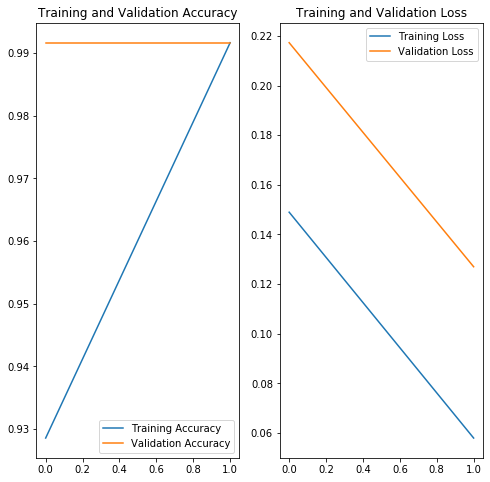

Found 2153 images belonging to 120 classes.
430/430 [==============================] - 79s 184ms/step
[23 23 23 ... 23 23 23]
